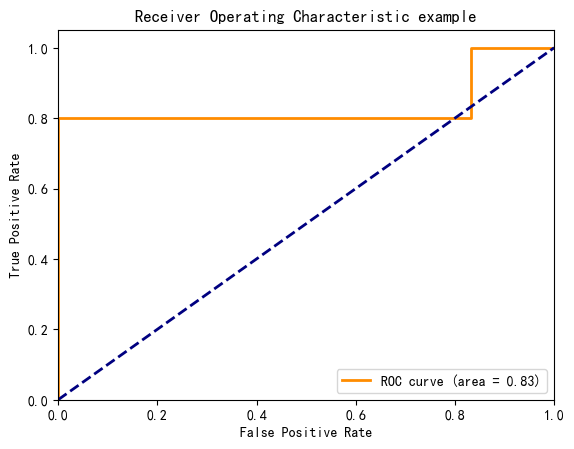

[0.         0.33512393 0.         0.03219038 0.         0.
 0.00398971 0.00374551 0.         0.         0.         0.03490015
 0.00071293 0.         0.07174835 0.13127491 0.         0.
 0.14342299 0.014972   0.00355172 0.00199798 0.         0.04077774
 0.         0.01305346 0.01442012 0.12311338 0.01637561 0.00369956
 0.         0.         0.         0.         0.         0.00255612
 0.00400636 0.         0.         0.         0.         0.
 0.         0.         0.         0.00436706]


ImportError: You must install graphviz to plot tree

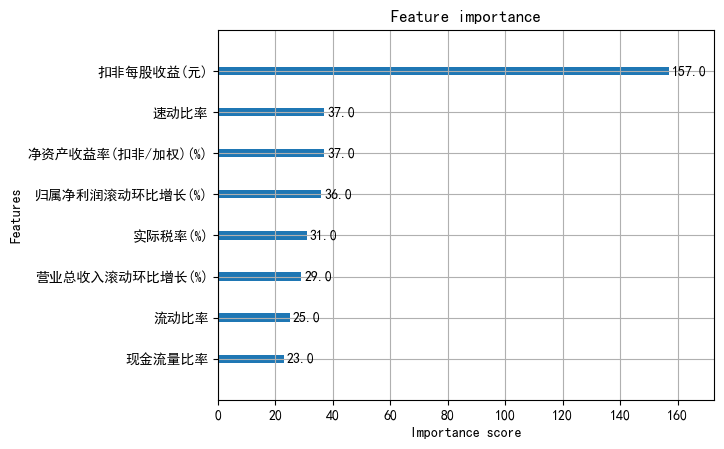

In [2]:
import sys
!{sys.executable} -m pip install xgboost
import pandas as pd
from sklearn.metrics import roc_auc_score,accuracy_score,roc_curve
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_tree
import os
from sklearn.model_selection import GridSearchCV  #可以对模型参数进行网格搜索，此处没去用


# In[154]:


s1=pd.read_excel("E:\\0 团队 知识工程\\代码\\相关性、皮尔逊、xgboost\\变量指标5.xlsx",sheet_name='增加数据量1')


# In[155]:


Y=s1['y'] #选择Y值
X=s1.drop(['y','date1'],axis=1) #确定X值
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=20)#训练集和测试集7:3


# In[156]:


#此段已被注释掉
"""
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01,0.03,0.05,0.1, 0.2],
    'n_estimators':[100,200,300,400],
     'alpha': [0.1,0.2,0.3,0.4,0.5],
    'subsample': [0.6, 0.8, 1.0],
    'max_depth': [2,3,4,5,6]
    
}
grid_search = GridSearchCV(estimator=xgb.XGBClassifier(), param_grid=param_grid, scoring='roc_auc', cv=3)

# 执行网格搜索
grid_search.fit(x_train,y_train)

# 输出最佳参数和最佳得分
print("Best parameters found: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
"""


# In[157]:


#模型训练
m1=xgb.XGBClassifier(learning_rate=0.01,max_depth=5,n_estimators=200,alpha=0.1,subsample=1.0)
m1.fit(x_train,y_train)


# In[158]:


#计算训练集AUC
yy_train1=m1.predict_proba(x_train)[:,1]
#FPR22,recall22,thresholds22 = roc_curve(y_test,yy,pos_label=1)
auc_train=roc_auc_score(y_train,yy_train1)
auc_train


# In[159]:


#计算训练集准确度，其实这个指标意义不大。比方说逾期坏样本总共占比才1%，不用模型瞎蒙都说是好样本，那准确性就有99%
m1.score(x_train,y_train)


# In[160]:


#计算训练集准确度
m1.score(x_test,y_test)


# In[161]:


#计算测试集AUC
yy=m1.predict_proba(x_test)[:,1]
#FPR22,recall22,thresholds22 = roc_curve(y_test,yy,pos_label=1)
auc=roc_auc_score(y_test,yy)
auc


# In[162]:


#画出auc曲线
fpr, tpr, hresholds =roc_curve(y_test,yy) #计算tpr、fpr
plt.rcParams['font.sans-serif'] = ['SimHei'] #设置能显示中文
plt.rcParams['axes.unicode_minus'] = False
# 绘制ROC曲线
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic example')
plt.legend(loc="lower right")
plt.show()


# In[163]:


print(m1.feature_importances_) #特征重要性，加起来为1


# In[151]:


xgb.plot_importance(m1, max_num_features=8) #最大的8个特征重要性


# In[164]:


#画出树图
digraph = xgb.to_graphviz(m1, num_trees=1,rankdir='LR')
digraph.format = 'png'
#digraph.body.insert(0, '\tnode [fontname="FangSong" shape=plaintext]')
digraph.view('C:\\Users\\86136\\Desktop\\相关材料研究\\xgb_tree10\\xgb_view7') 

#下面这些代码都是为了让中文能够实现而加入的
with open('C:\\Users\\86136\\Desktop\\相关材料研究\\xgb_tree10\\xgb_view7', 'r', encoding='utf-8') as file: 
    lines = file.readlines()

# 找到插入位置并插入新行
insert_index = 2  # 在第二行之后插入
new_line = 'node [fontname="FangSong" shape=plaintext]\n'
lines.insert(insert_index, new_line)



# 将修改后的内容写回文件
with open('C:\\Users\\86136\\Desktop\\相关材料研究\\xgb_tree10\\xgb_view7', 'w', encoding='utf-8') as file:
    file.writelines(lines)
os.system('dot -Tjpg C:\\Users\\86136\\Desktop\\相关材料研究\\xgb_tree10\\xgb_view7 -o C:\\Users\\86136\\Desktop\\相关材料研究\\xgb_tree10\\xgb_view10.png')






